In [1]:
import pandas as pd
dataset=pd.read_csv("kidney_disease.csv")
dataset.columns = ['id',
    'age',
    'blood_pressure',
    'specific_gravity',
    'albumin',
    'sugar',
    'red_blood_cells',
    'pus_cell',
    'pus_cell_clumps',
    'bacteria',
    'blood_glucose_random',
    'blood_urea',
    'serum_creatinine',
    'sodium',
    'potassium',
    'haemoglobin',
    'packed_cell_volume',
    'white_blood_cell_count',
    'red_blood_cell_count',
    'hypertension',
    'diabetes_mellitus',
    'coronary_artery_disease',
    'appetite',
    'peda_edema',
    'aanemia',
    'classification'
]

In [2]:
# Select categorical columns (excluding numeric)
cat_cols = ['red_blood_cells','pus_cell','pus_cell_clumps',
            'bacteria','hypertension','diabetes_mellitus',
            'coronary_artery_disease','appetite','peda_edema',
            'aanemia','classification']

# Frequency + Relative Frequency + Cumulative
def categorical_summary(df, column):
    freq = df[column].value_counts(dropna=False)
    rel_freq = df[column].value_counts(normalize=True, dropna=False) * 100
    cum_rel = rel_freq.cumsum()
    summary = pd.DataFrame({
        "Frequency": freq,
        "Relative %": rel_freq.round(2),
        "Cumulative %": cum_rel.round(2)
    })
    return summary

# Example usage for one column
print(categorical_summary(dataset, "classification"))


                Frequency  Relative %  Cumulative %
classification                                     
ckd                   248        62.0          62.0
notckd                150        37.5          99.5
ckd\t                   2         0.5         100.0


In [3]:
for col in cat_cols:
    print(f"\n=== {col} ===")
    print(categorical_summary(dataset, col))



=== red_blood_cells ===
                 Frequency  Relative %  Cumulative %
red_blood_cells                                     
normal                 201       50.25         50.25
NaN                    152       38.00         88.25
abnormal                47       11.75        100.00

=== pus_cell ===
          Frequency  Relative %  Cumulative %
pus_cell                                     
normal          259       64.75         64.75
abnormal         76       19.00         83.75
NaN              65       16.25        100.00

=== pus_cell_clumps ===
                 Frequency  Relative %  Cumulative %
pus_cell_clumps                                     
notpresent             354        88.5          88.5
present                 42        10.5          99.0
NaN                      4         1.0         100.0

=== bacteria ===
            Frequency  Relative %  Cumulative %
bacteria                                       
notpresent        374        93.5          93.5
present   

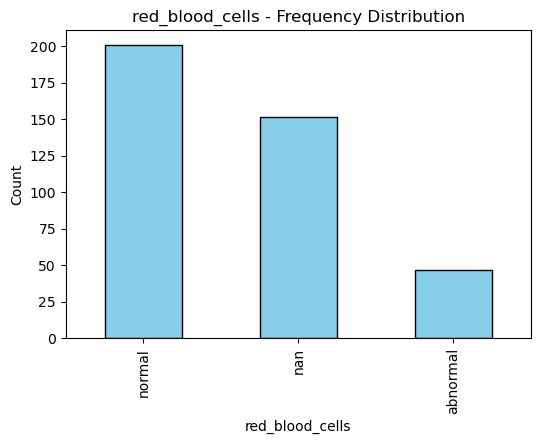

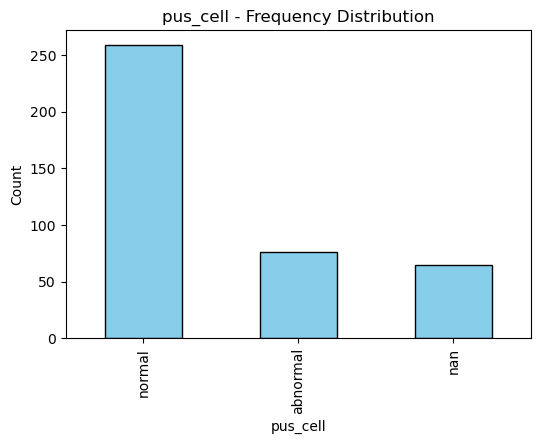

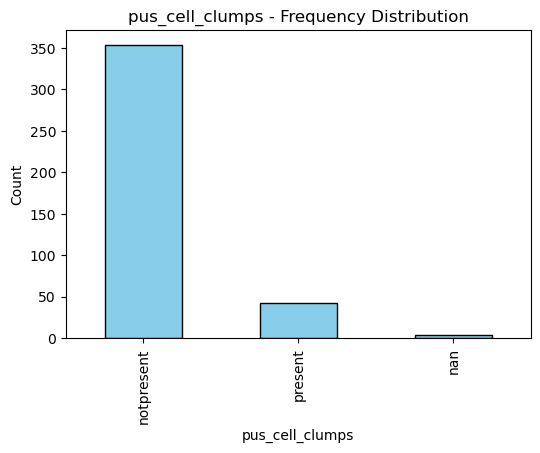

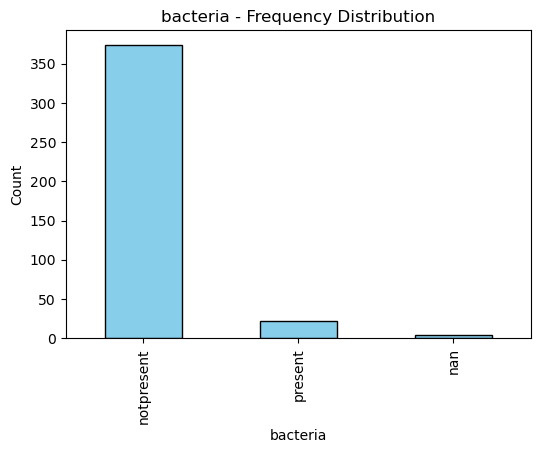

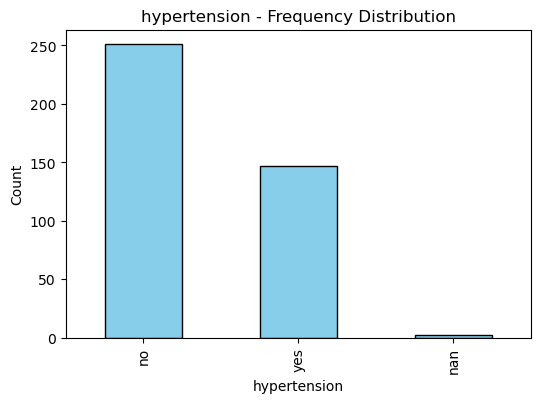

C:\Users\Nishok\miniconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


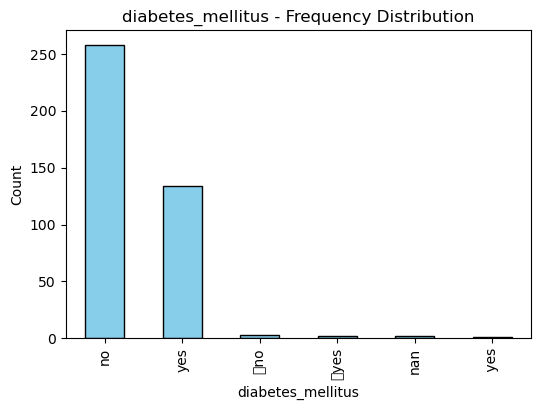

C:\Users\Nishok\miniconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


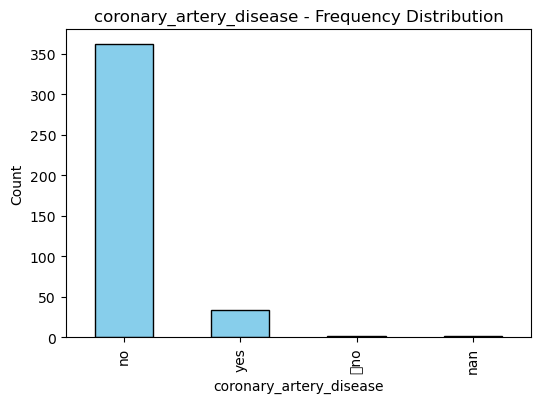

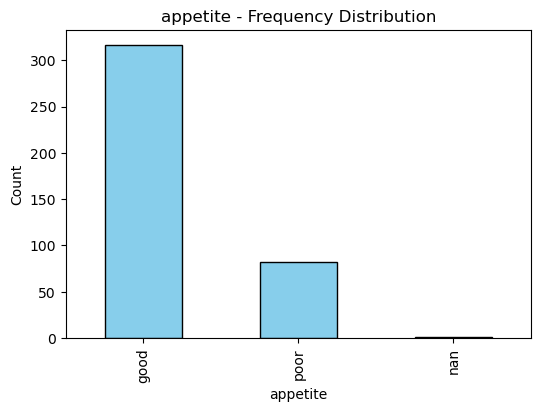

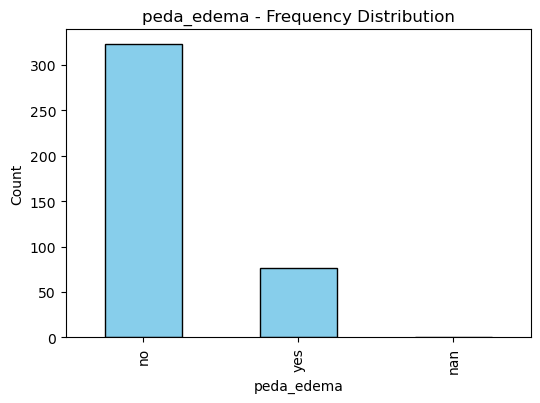

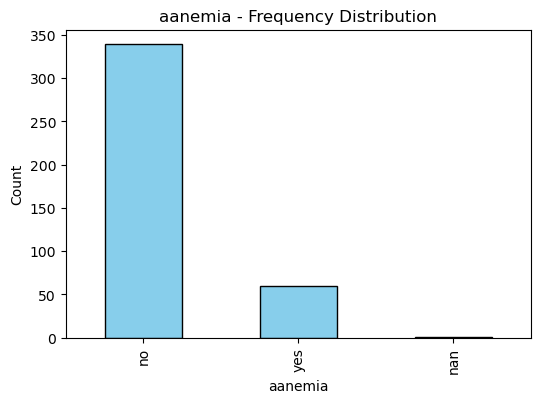

C:\Users\Nishok\miniconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


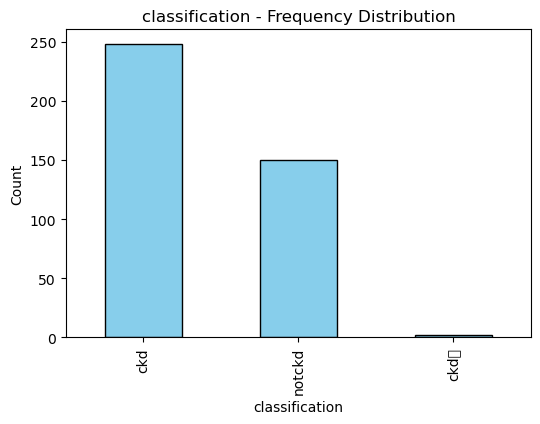

In [4]:
import matplotlib.pyplot as plt

for col in cat_cols:
    dataset[col].value_counts(dropna=False).plot(
        kind='bar', figsize=(6,4), color="skyblue", edgecolor="black"
    )
    plt.title(f"{col} - Frequency Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [1]:
# Master Summary Table for Numerical UVA
master_summary = []

for col in df_imputed.columns:
    s = df_imputed[col]
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    
    skew = s.skew()
    kurt = s.kurtosis()
    
    lower_outliers = (s < lower).sum()
    upper_outliers = (s > upper).sum()
    
    master_summary.append({
        "Column": col,
        "Mean": round(s.mean(),2),
        "Median": round(s.median(),2),
        "Min": round(s.min(),2),
        "Max": round(s.max(),2),
        "IQR": round(iqr,2),
        "Skewness": round(skew,2),
        "Kurtosis": round(kurt,2),
        "Lower Outliers": lower_outliers,
        "Upper Outliers": upper_outliers,
        "Total Outliers": lower_outliers + upper_outliers
    })

master_df = pd.DataFrame(master_summary).set_index("Column")
print(master_df)


NameError: name 'df_imputed' is not defined